Kevin Trafford
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [37]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [38]:
X = mushrooms_df.drop(columns=['type'])
y = mushrooms_df['type']

ordinal_features = ['gill_spacing', 'cap_surface', 'ring_number']  
categorical_features = [col for col in X.columns if col not in ordinal_features]

encoder = OrdinalEncoder()
X[ordinal_features] = encoder.fit_transform(X[ordinal_features])

X = pd.get_dummies(X, columns=categorical_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

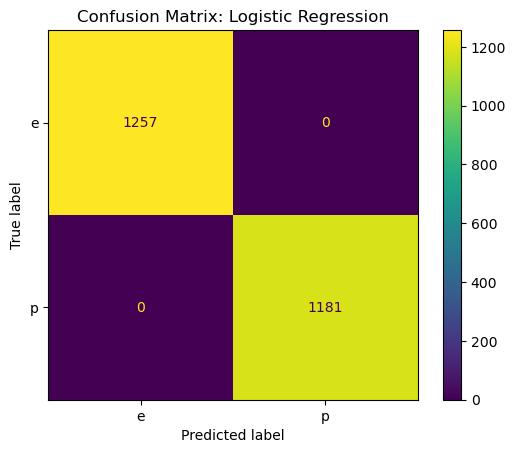

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [39]:
log_reg = LogisticRegressionCV(cv=5, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=log_reg.classes_)
disp_log_reg.plot(cmap='viridis')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=log_reg.classes_)
print("Classification Report: Logistic Regression")
print(report_log_reg)

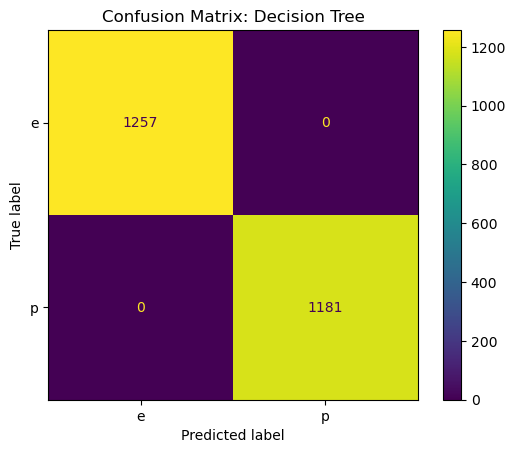

Classification Report: Decision Tree
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [40]:
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.best_estimator_.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt.best_estimator_.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.best_estimator_.classes_)
disp_dt.plot(cmap='viridis')
plt.title("Confusion Matrix: Decision Tree")
plt.show()

report_dt = classification_report(y_test, y_pred_dt, target_names=dt.best_estimator_.classes_)
print("Classification Report: Decision Tree")
print(report_dt)

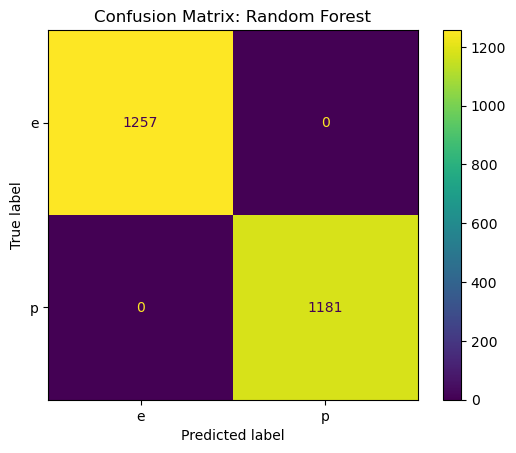

Classification Report: Random Forest
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [41]:
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.best_estimator_.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.best_estimator_.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.best_estimator_.classes_)
disp_rf.plot(cmap='viridis')
plt.title("Confusion Matrix: Random Forest")
plt.show()

report_rf = classification_report(y_test, y_pred_rf, target_names=rf.best_estimator_.classes_)
print("Classification Report: Random Forest")
print(report_rf)

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: Logistic
- Hyper-parameters: cv=5, max_iter=1000
- Metrics
    - Accuracy: 1
    - Recall: 1
    - Precision: 1
- How did you decide best? 
All of the models performed extremely simililarly due to the nature of the data, therefore I chose logistic due to its simplicity whilst being as effective as the other models

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [42]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

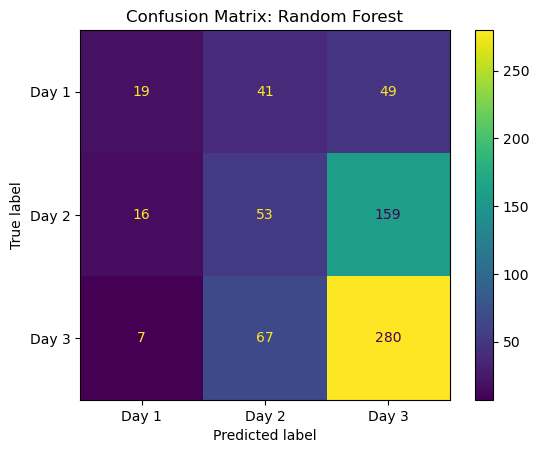

Classification Report: Random Forest
              precision    recall  f1-score   support

       Day 1       0.45      0.17      0.25       109
       Day 2       0.33      0.23      0.27       228
       Day 3       0.57      0.79      0.67       354

    accuracy                           0.51       691
   macro avg       0.45      0.40      0.40       691
weighted avg       0.47      0.51      0.47       691



In [46]:
nfl_draft['draft_day'] = pd.cut(nfl_draft['round'], bins=[0, 1, 3, 7], labels=['Day 1', 'Day 2', 'Day 3'])

features = ['age', 'height', 'weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle']
X = nfl_draft[features]
y = nfl_draft['draft_day']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


cm_rf = confusion_matrix(y_test, y_pred, labels=y_test.cat.categories)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=y_test.cat.categories)
disp_rf.plot(cmap='viridis')
plt.title("Confusion Matrix: Random Forest")
plt.show()


report_rf = classification_report(y_test, y_pred, target_names=y_test.cat.categories)
print("Classification Report: Random Forest")
print(report_rf)




### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
 I chose the random forrrest classifier. The reason for this was because it is better suited for complex data sets and combines multiple decision trees for better accuracy. Also, it is better for when there is missing data, which occurs due to the fact that not all players compete in every aspect of the combine.
 - What was your accuracy?
 0.51